In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# train_data_path = '/content/drive/My Drive/train_data.csv'
# test_data_path='/content/drive/My Drive/test_data.csv'

# X_train = pd.read_csv('/content/drive/My Drive/Bhavik/X_train.csv')
# y_train = pd.read_csv('/content/drive/My Drive/Bhavik/y_train.csv')
# X_test = pd.read_csv('/content/drive/My Drive/Bhavik/X_test.csv')
# y_test = pd.read_csv('/content/drive/My Drive/Bhavik/y_test.csv')

df = pd.read_csv('/content/drive/My Drive/Bhavik/final.csv')
X = df.drop('price', axis=1)
y = df['price']


Mounted at /content/drive


In [2]:
def metrices(model,X_train,X_test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics

    if num_iteration > 0:
        predictions_train = model.predict(X_train, num_iteration = num_iteration)
        predictions_test = model.predict(X_test, num_iteration = num_iteration)
    else:
        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)

    acc_train_r2_num = round(r2_score(y_train.values.ravel(), predictions_train) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)



    acc_train_rmse_num = round(mean_squared_error(y_train.values.ravel(), predictions_train) ** 2 * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)



    acc_test_r2_num = round(r2_score(y_test.values.ravel(), predictions_test) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)


    acc_test_rmse_num = round(mean_squared_error(y_test.values.ravel(), predictions_test)**2 * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)


In [3]:
# prompt: standardize X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import StandardScaler

Rfr = RandomForestRegressor(criterion="squared_error",random_state=0, max_depth=20, min_samples_split= 10, n_estimators=100, bootstrap=True)
Rfr.fit(X_train,y_train.values.ravel())


RandomForestRegressor(max_depth=20, min_samples_split=10, random_state=0)

In [6]:
metrices(Rfr,X_train,X_test)

acc(r2_score) for train = 93.04
acc(rmse) for train = 1.259969798002148e+16
acc(r2_score) for test = 86.75
acc(rmse) for test = 4.4632562690135e+16


In [7]:

import lightgbm as lgb

train_set = lgb.Dataset(X_train, y_train.values.ravel())
valid_set = lgb.Dataset(X_test, y_test)

In [8]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': False,
        'seed':0,
    }
modelLgb = lgb.train(params, train_set = train_set, num_boost_round=10000, valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5185
[LightGBM] [Info] Number of data points in the train set: 241783, number of used features: 13
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 18191.590335


In [9]:
import pickle
filename = '/content/drive/My Drive/Bhavik/modelLgb.sav'
pickle.dump(modelLgb, open(filename, 'wb'))


In [10]:

# predictions_train = modelLgb.predict(X_train)
# predictions_test = modelLgb.predict(X_test)
# predictions_test
# r2_train = r2_score(y_train.values.ravel(), predictions_train)
# r2_test = r2_score(y_test.values.ravel(), predictions_test)

# mse_train = mean_squared_error(y_train.values.ravel(), predictions_train)
# mse_test = mean_squared_error(y_test.values.ravel(), predictions_test)

# print("Mean Squared Error for train data:", mse_train)
# print("Mean Squared Error for train data:", mse_test)
# print(f'R-squared of Random forest regressor for train data: {r2_train}')
# print(f'R-squared of Random forest regressor for test data: {r2_test}')


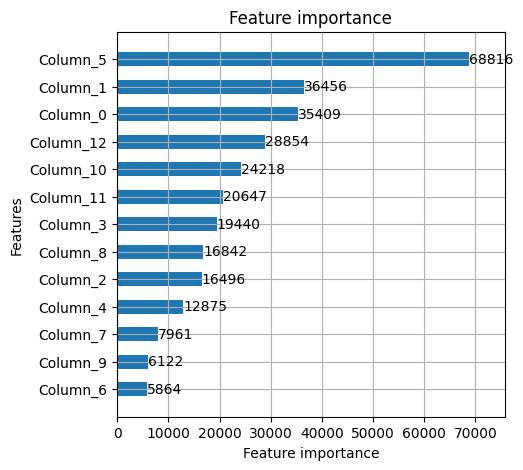

In [11]:

fig =  plt.figure(figsize = (5,5))
axes = fig.add_subplot(111)
lgb.plot_importance(modelLgb,ax = axes,height = 0.5)
plt.show();
plt.close()

In [12]:
metrices(modelLgb,X_train,X_test)

acc(r2_score) for train = 87.31
acc(rmse) for train = 4.192786513092764e+16
acc(r2_score) for test = 85.31
acc(rmse) for test = 5.485405288351695e+16
